In [1]:
import os 
from general_plot import *

model_name = model_name_list[1] 


[WARNING]: not equal number in x_axis, u_bes != u_random
u_bes: [ 1  2  3  4  5  6  7  8  9 10 11]
u_random: [   1    4   15   51  153  427 1127 2858]
labels after:  [ 1  2  3  4  5  6  7  8  9 10 11]
labels after:  ['1 (1)', '4 (2)', '15 (3)', '51 (4)', '153 (5)', '427 (6)', '1127 (7)', '2858 (8)']


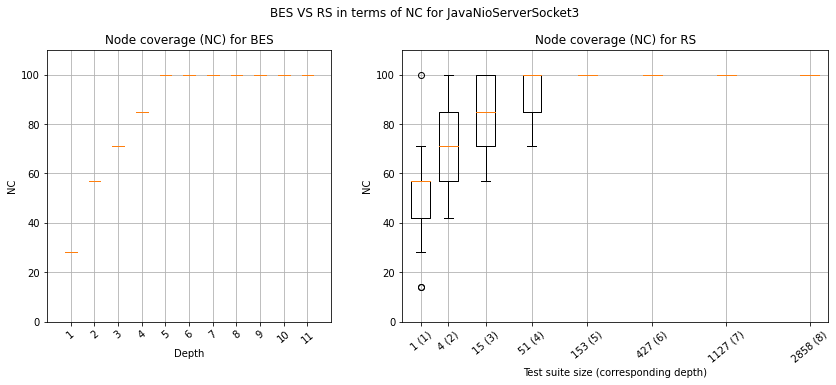

In [2]:

# repeat multi_times for each model and for each loopOpt
# init
loopOpt = False

bes_csv, random_csv, u_bes, u_random =  get_csv_unique(model_name, loopOpt)


# positions=[1, 2, 4,   6, 9, 12, 16,    20]
# positions=[1, 2, 3.5, 6, 9, 13, 17.5, 22.5] 


#nc 
data_map = {
    'need_y_limit' : True,
    'need_positions' : True,
    'need_xtick' : True,
    'positions' : [1, 2.5, 4.5, 7, 10, 13.5, 17.5, 22],
    'model_name': model_name,
    'loopOpt': bool_to_str(loopOpt),
    
    'bes_title': f'Node coverage (NC) for BES{bool_to_shortcut(loopOpt)}',
    'rand_title': 'Node coverage (NC) for RS',
    
    'x_bes_label': 'Depth',
    'x_rand_label': 'Test suite size (corresponding depth)',
    
    'box_width_bes' : .6,
    'box_width_rand' : 1,
    
    'x_bes_lim': 12,
    'x_rand_lim' : 23,
    
    'y_bes_lim': 110,
    'y_rand_lim' : 110,
    
    'y_bes_label': 'NC',
    'y_rand_label': 'NC',
    
    'width_bes_ratio': 1,
    'width_rand_ratio': 1.5,
    
    'distance_to_figures': 1,
    'fig_width': 14


}


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', 'nc', u_bes, u_random, data_map)
    

labels after:  [ 1  2  3  4  5  6  7  8  9 10 11]
labels after:  ['1 (1)', '4 (2)', '15 (3)', '51 (4)', '153 (5)', '427 (6)', '1127 (7)', '2858 (8)']


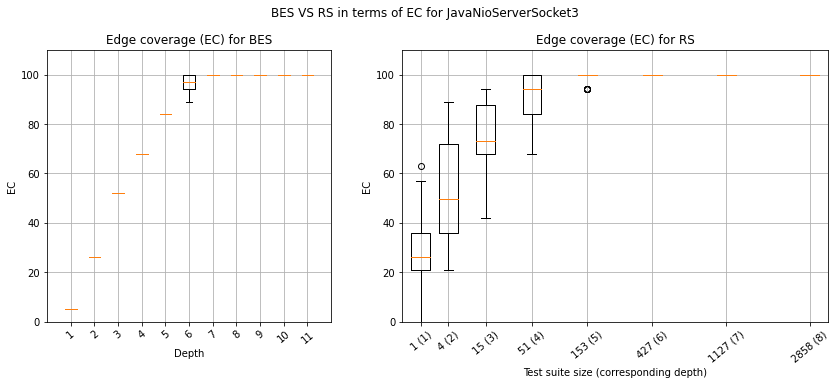

In [3]:
# ec 
coverage = 'EC'
data_map['bes_title'] = f'Edge coverage ({coverage}) for BES{bool_to_shortcut(loopOpt)}'
data_map['y_bes_label'] = coverage
# 'width_ratio': 1

data_map['rand_title'] = f'Edge coverage ({coverage}) for RS'
data_map['y_rand_label'] = coverage
# 'width_ratio': 1.5


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', coverage.lower(),
                         u_bes, u_random, data_map)



labels after:  [ 1  2  3  4  5  6  7  8  9 10 11]
labels after:  ['1 (1)', '4 (2)', '15 (3)', '51 (4)', '153 (5)', '427 (6)', '1127 (7)', '2858 (8)']


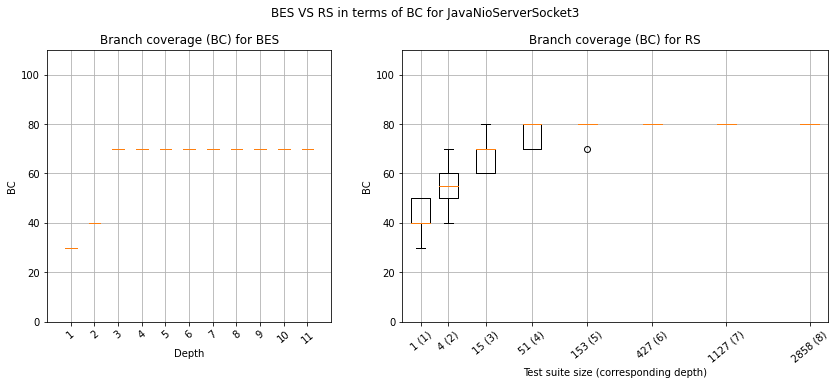

In [4]:
# bc
coverage = 'BC'  #TODO here bc are the same
data_map['bes_title'] = f'Branch coverage ({coverage}) for BES{bool_to_shortcut(loopOpt)}'
data_map['y_bes_label'] = coverage
# 'width_ratio': 1

data_map['rand_title'] = f'Branch coverage ({coverage}) for RS'
data_map['y_rand_label'] = coverage
# 'width_ratio': 1.5


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', f'total_{coverage.lower()}',
                         u_bes, u_random, data_map)
    

labels after:  [ 1  2  3  4  5  6  7  8  9 10 11]
labels after:  ['1 (1)', '4 (2)', '15 (3)', '51 (4)', '153 (5)', '427 (6)', '1127 (7)', '2858 (8)']


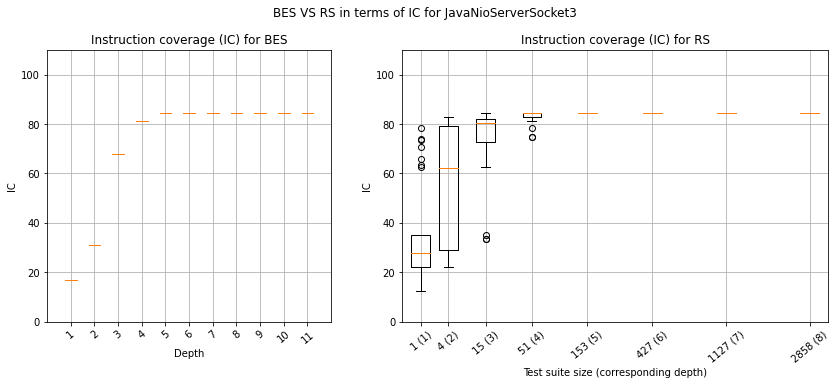

In [5]:
# ic
coverage = 'IC'
data_map['bes_title'] = f'Instruction coverage ({coverage}) for BES{bool_to_shortcut(loopOpt)}'
data_map['y_bes_label'] = coverage
# 'width_ratio': 1

data_map['rand_title'] = f'Instruction coverage ({coverage}) for RS'
data_map['y_rand_label'] = coverage
# 'width_ratio': 1.5


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', f'total_{coverage.lower()}',
                         u_bes, u_random, data_map)
    

depth 1 --> [1]
depth 2 --> [4]
depth 3 --> [15]
depth 4 --> [51]
depth 5 --> [153]
depth 6 --> [427]
depth 7 --> [1127]
depth 8 --> [2852, 2853, 2854, 2855, 2856, 2857, 2858, 2859, 2860, 2861, 2862]
depth 9 --> [7040, 7044, 7023, 7024, 7026, 7027, 7028, 7029, 7030, 7031, 7032, 7033, 7034, 7036, 7037, 7038, 7039]
depth 10 --> [16976, 16977, 16981, 16984, 16985, 16986, 16989, 16990, 16992, 16994, 16995, 16996, 16998, 16999, 17000, 17001, 17003, 17004, 17005, 17009]
depth 11 --> [40579, 40581, 40582, 40583, 40585, 40586, 40587, 40589, 40590, 40595, 40598, 40605, 40612, 40551, 40559, 40560, 40561, 40562, 40563, 40565, 40566, 40570, 40571, 40572, 40573]
labels after:  [ 1  2  3  4  5  6  7  8  9 10 11]
labels after:  ['1 (1)', '4 (2)', '15 (3)', '51 (4)', '153 (5)', '427 (6)', '1127 (7)', '2858 (8)']


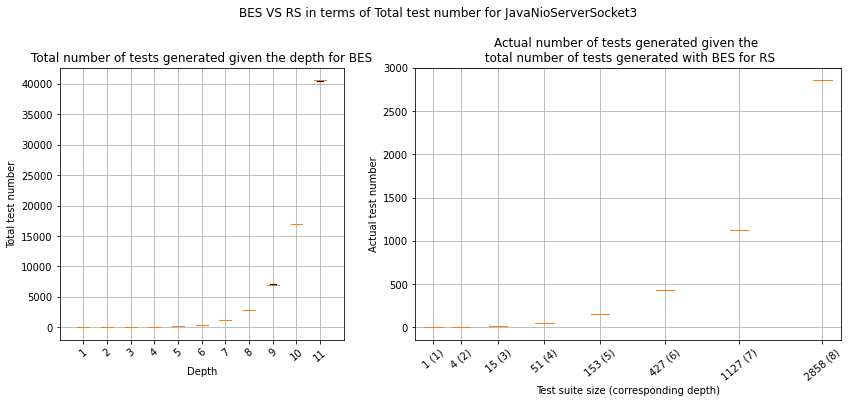

In [6]:
# total_test
creteria = 'total_tests'
data_map['need_y_limit'] = False

data_map['bes_title'] = f'Total number of tests generated given the depth for BES{bool_to_shortcut(loopOpt)}'
data_map['y_bes_label'] = 'Total test number'
# 'width_ratio': 1
data_map['distance_to_figures'] = 1.05

data_map['rand_title'] = f'Actual number of tests generated given the \n total number of tests generated with BES for RS'
data_map['y_rand_label'] = 'Actual test number'
# 'width_ratio': 1.5

total_tests = extract_unique_as_map(bes_csv, u_bes, 'depth', creteria)
print_map(total_tests, 'depth')


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', creteria,
                         u_bes, u_random, data_map)



depth 1 --> [1.867876052856445, 1.429033279418945, 2.010962963104248, 1.9424071311950684, 1.888033151626587, 2.141307830810547, 1.8872201442718504, 2.1135029792785645, 2.0248608589172363, 1.992674827575684, 2.0414929389953613, 2.014503002166748, 2.006291389465332, 2.037163019180298, 2.125317096710205, 2.095149040222168, 2.1039681434631348, 2.0612196922302246, 2.0433709621429443, 2.0403871536254883, 1.9313130378723145, 1.9200258255004885, 1.964274883270264, 2.055680990219116, 2.003056764602661, 2.051994800567627, 2.0144338607788086, 2.0603299140930176, 2.111290693283081, 1.9957079887390137, 1.8371851444244385, 1.8933000564575195, 1.8917131423950195, 1.94498872756958, 1.984544038772583, 1.9970850944519043, 1.96399998664856, 1.913918256759644, 1.8954379558563232, 2.102288722991944, 2.0019619464874268, 2.007200002670288, 2.011500835418701, 2.0692028999328613, 2.039923906326294, 2.136507987976074, 2.088324785232544, 2.017254114151001, 2.117419958114624, 2.142651081085205, 2.0387120246887207

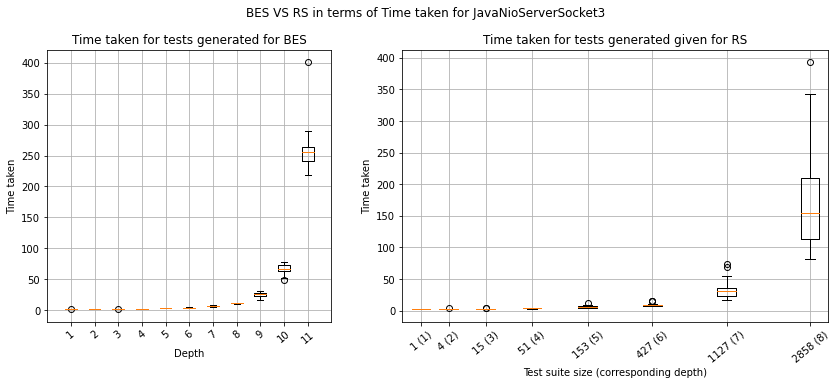

In [7]:
# time_taken
creteria = 'time_taken'
data_map['bes_title'] = f'Time taken for tests generated for BES{bool_to_shortcut(loopOpt)}'
data_map['y_bes_label'] = 'Time taken'
data_map['distance_to_figures'] = 1

data_map['rand_title'] = f'Time taken for tests generated given for RS'
data_map['y_rand_label'] = 'Time taken'
data_map['width_rand_ratio']: 1

time_taken = extract_unique_as_map(bes_csv, u_bes, 'depth', creteria)
print_map(time_taken, 'depth')

compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', creteria,
                         u_bes, u_random, data_map)



In [8]:
# trie total path 
creteria = 'trie_total_path'


trie_total_path = extract_unique_as_map(bes_csv, u_bes, 'depth', creteria)
print_map(trie_total_path, 'depth')

print("**********************")
latex = to_latex('total trie path', trie_total_path)
print(latex)
print("**********************")

# fig, ax = plt.subplots(figsize=(12, 6))

data_map['bes_title'] = f'Total number of test generated by the \ntrie given the depth for BES'
data_map['y_bes_label'] = 'Total test number in the trie'

# plot_one_box(bes_csv, 'depth', creteria, u_bes, data_map)



depth 1 --> [1]
depth 2 --> [4]
depth 3 --> [15]
depth 4 --> [51]
depth 5 --> [165]
depth 6 --> [518]
depth 7 --> [1599]
depth 8 --> [4883]
depth 9 --> [14814]
depth 10 --> [44752]
depth 11 --> [134833]
**********************
\begin{table}[total trie path]
\begin{tabular}{|c|c|}
\hline
& Depth & Total number of tests generated by the trie \\ \hline \hline
1 & 1        \\ \hline
2 & 4        \\ \hline
3 & 15        \\ \hline
4 & 51        \\ \hline
5 & 165        \\ \hline
6 & 518        \\ \hline
7 & 1599        \\ \hline
8 & 4883        \\ \hline
9 & 14814        \\ \hline
10 & 44752        \\ \hline
11 & 134833        \\ \hline
\end{tabular}
\end{table}
**********************


trie_total   : [1, 4, 15, 51, 165, 518, 1599, 4883, 14814, 44752, 134833]
actual before: [1, 4, 15, 51, 153, 427, 1127, 2852, 7040, 16976, 40579]
actual after : [1, 4, 15, 51, 153, 427, 1127, 2858, 7040, 16976, 40579]
**********************
\begin{table}[trie vs actual]
\begin{tabular}{|c||c|c|}
\hline
& Depth & Total number of tests generated by the trie & Actual number of tests generated by Modbat \\ \hline \hline
1 & 1 & 1  \\ \hline
2 & 4 & 4  \\ \hline
3 & 15 & 15  \\ \hline
4 & 51 & 51  \\ \hline
5 & 165 & 153  \\ \hline
6 & 518 & 427  \\ \hline
7 & 1599 & 1127  \\ \hline
8 & 4883 & 2858  \\ \hline
9 & 14814 & 7040  \\ \hline
10 & 44752 & 16976  \\ \hline
11 & 134833 & 40579  \\ \hline
\end{tabular}
\end{table}
**********************


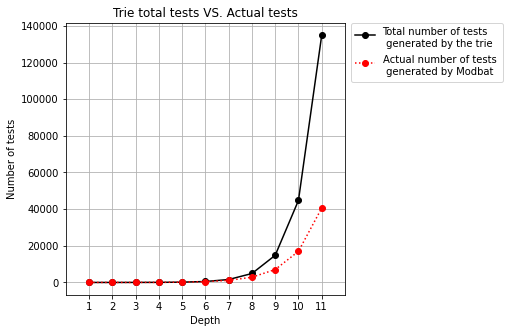

In [9]:

y1 = extract_unique_as_list(bes_csv, u_bes, 'depth', 'trie_total_path')
print(f'trie_total   : {y1}')
y2 = extract_unique_as_list(bes_csv, u_bes, 'depth', 'total_tests')
print(f'actual before: {y2}')
y2[7] = 2858
print(f'actual after : {y2}')


print("**********************")
latex = to_latex_compare('trie vs actual', u_bes, y1, y2)
print(latex)
print("**********************")




data_map['bes_title'] = f'Trie total tests VS. Actual tests'
data_map['x_bes_label'] = 'Depth'
data_map['y_bes_label'] = 'Number of tests'

data_map['y1_label'] = 'Total number of tests \n generated by the trie'
data_map['y2_label'] = 'Actual number of tests \n generated by Modbat'


plot_one_linear(u_bes, y1, y2, data_map)


[WARNING]: not equal number in x_axis, u_bes != u_random
u_bes: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
u_random: [   1    4   13   37   86  180  347  623 1068 1796 3019]
labels after:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
labels after:  ['1 (1)', '4 (2)', '13 (3)', '37 (4)', '86 (5)', '180 (6)', '347 (7)', '623 (8)', '1068 (9)', '1796 (10)', '3019 (11)']


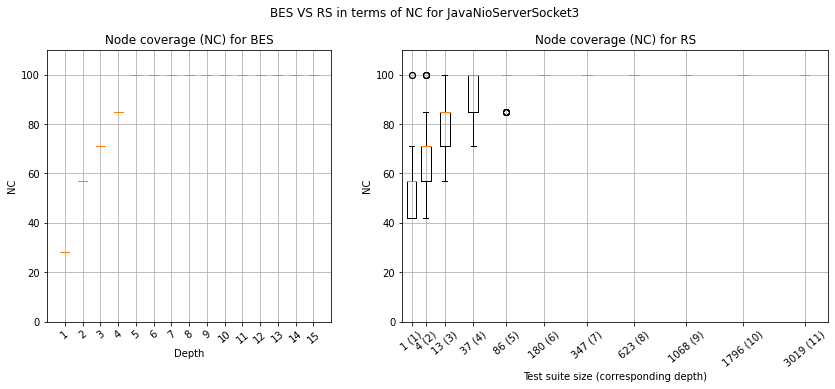

In [10]:
loopOpt = True

bes_csv, random_csv, u_bes, u_random =  get_csv_unique(model_name, loopOpt)


#nc 
data_map['loopOpt'] = bool_to_str(loopOpt)
data_map['need_y_limit'] = True

# data_map['positions'] = [1, 2,   3.5, 6, 9,  13,   17.5, 22.5] 
data_map['positions'] =   [1, 2.5, 4.5, 7.5, 11, 15, 19.5, 24.5, 30, 36, 42.5]
coverage ='NC'

data_map['bes_title'] = f'Node coverage ({coverage}) for BES{bool_to_shortcut(loopOpt)}'
data_map['y_bes_label'] = coverage

data_map['rand_title'] = f'Node coverage ({coverage}) for RS'
data_map['y_rand_label'] = coverage

data_map['x_bes_lim'] = 16
data_map['x_rand_lim'] = 45


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', 'nc', u_bes, u_random, data_map)
    

labels after:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
labels after:  ['1 (1)', '4 (2)', '13 (3)', '37 (4)', '86 (5)', '180 (6)', '347 (7)', '623 (8)', '1068 (9)', '1796 (10)', '3019 (11)']


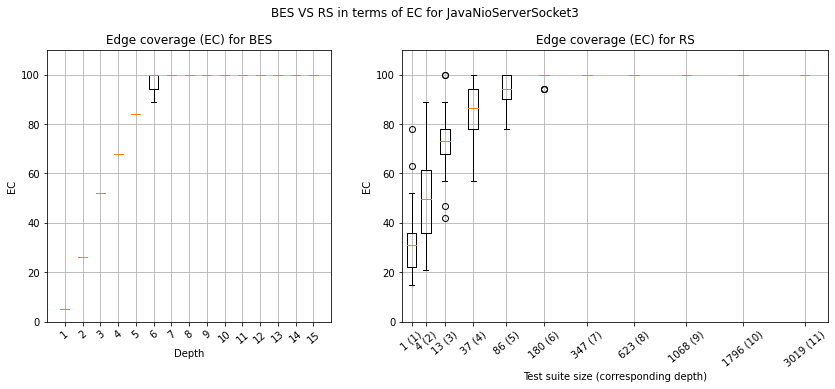

In [11]:
# ec 
coverage = 'EC'
data_map['bes_title'] = f'Edge coverage ({coverage}) for BES{bool_to_shortcut(loopOpt)}'
data_map['y_bes_label'] = coverage
# 'width_ratio': 1

data_map['rand_title'] = f'Edge coverage ({coverage}) for RS'
data_map['y_rand_label'] = coverage
# 'width_ratio': 1.5


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', coverage.lower(),
                         u_bes, u_random, data_map)



labels after:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
labels after:  ['1 (1)', '4 (2)', '13 (3)', '37 (4)', '86 (5)', '180 (6)', '347 (7)', '623 (8)', '1068 (9)', '1796 (10)', '3019 (11)']


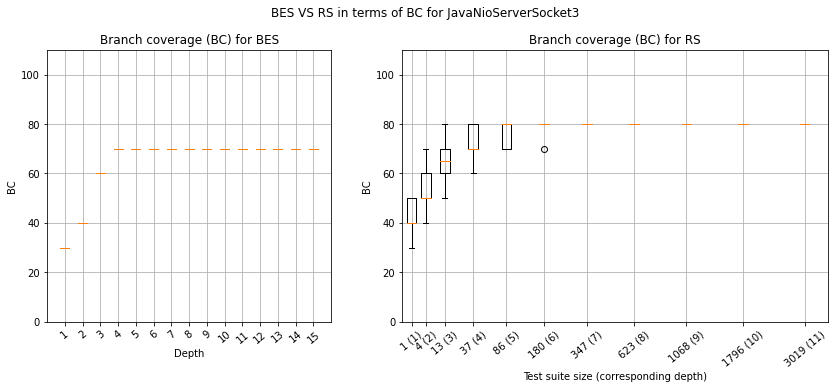

In [12]:
# bc
coverage = 'BC'  #TODO here bc are the same
data_map['bes_title'] = f'Branch coverage ({coverage}) for BES{bool_to_shortcut(loopOpt)}'
data_map['y_bes_label'] = coverage
# 'width_ratio': 1

data_map['rand_title'] = f'Branch coverage ({coverage}) for RS'
data_map['y_rand_label'] = coverage
# 'width_ratio': 1.5


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', f'total_{coverage.lower()}',
                         u_bes, u_random, data_map)
    

labels after:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
labels after:  ['1 (1)', '4 (2)', '13 (3)', '37 (4)', '86 (5)', '180 (6)', '347 (7)', '623 (8)', '1068 (9)', '1796 (10)', '3019 (11)']


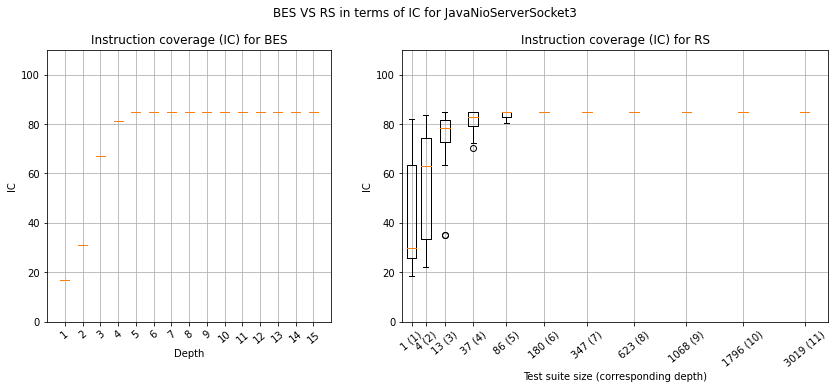

In [13]:
# ic
coverage = 'IC'
data_map['bes_title'] = f'Instruction coverage ({coverage}) for BES{bool_to_shortcut(loopOpt)}'
data_map['y_bes_label'] = coverage
# 'width_ratio': 1

data_map['rand_title'] = f'Instruction coverage ({coverage}) for RS'
data_map['y_rand_label'] = coverage
# 'width_ratio': 1.5


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', f'total_{coverage.lower()}',
                         u_bes, u_random, data_map)
    

depth 1 --> [1]
depth 2 --> [4]
depth 3 --> [13]
depth 4 --> [37]
depth 5 --> [86]
depth 6 --> [180]
depth 7 --> [347]
depth 8 --> [618, 619, 621, 622, 623, 624, 625, 626, 628]
depth 9 --> [1058, 1061, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1071, 1072, 1073, 1074, 1075, 1076]
depth 10 --> [1793, 1794, 1796, 1797, 1798, 1799, 1800, 1802, 1804, 1806, 1808, 1809, 1783, 1786, 1787, 1788, 1789]
depth 11 --> [2997, 2999, 3003, 3004, 3006, 3007, 3012, 3013, 3015, 3017, 3019, 3021, 3022, 3023, 3025, 3026, 3027, 3029, 3031, 3032, 3033, 3034, 3035]
depth 12 --> [5122, 5123, 5127, 5136, 5085, 5087, 5088, 5092, 5095, 5098, 5100, 5101, 5102, 5103, 5104, 5106, 5107, 5109, 5110, 5111, 5114, 5115, 5116, 5117, 5118, 5119]
depth 13 --> [8834, 8839, 8840, 8841, 8848, 8850, 8851, 8793, 8795, 8800, 8801, 8812, 8814, 8815, 8816, 8818, 8819, 8820, 8821, 8822, 8823, 8824, 8828, 8831]
depth 14 --> [15618, 15619, 15621, 15623, 15625, 15628, 15632, 15634, 15636, 15638, 15639, 15641, 15645, 15646, 15652, 15660

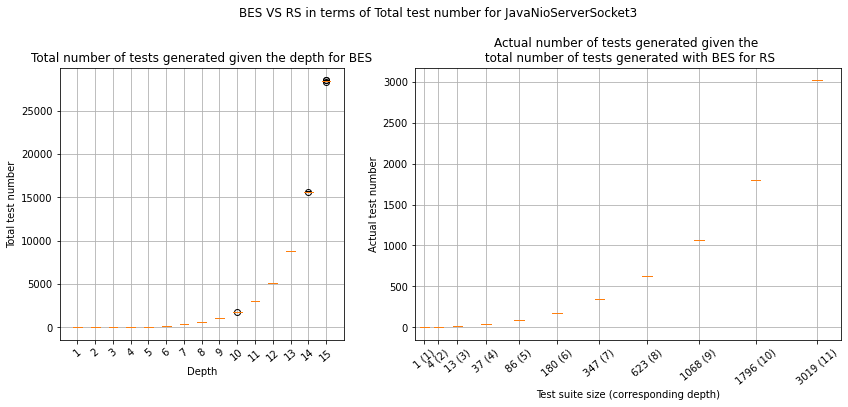

In [14]:
# total_test
creteria = 'total_tests'
data_map['need_y_limit'] = False

data_map['bes_title'] = f'Total number of tests generated given the depth for BES{bool_to_shortcut(loopOpt)}'
data_map['y_bes_label'] = 'Total test number'
# 'width_ratio': 1
data_map['distance_to_figures'] = 1.05

data_map['rand_title'] = f'Actual number of tests generated given the \n total number of tests generated with BES for RS'
data_map['y_rand_label'] = 'Actual test number'
# 'width_ratio': 1.5

total_tests = extract_unique_as_map(bes_csv, u_bes, 'depth', creteria)
print_map(total_tests, 'depth')


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', creteria,
                         u_bes, u_random, data_map)



labels after:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
labels after:  ['1 (1)', '4 (2)', '13 (3)', '37 (4)', '86 (5)', '180 (6)', '347 (7)', '623 (8)', '1068 (9)', '1796 (10)', '3019 (11)']


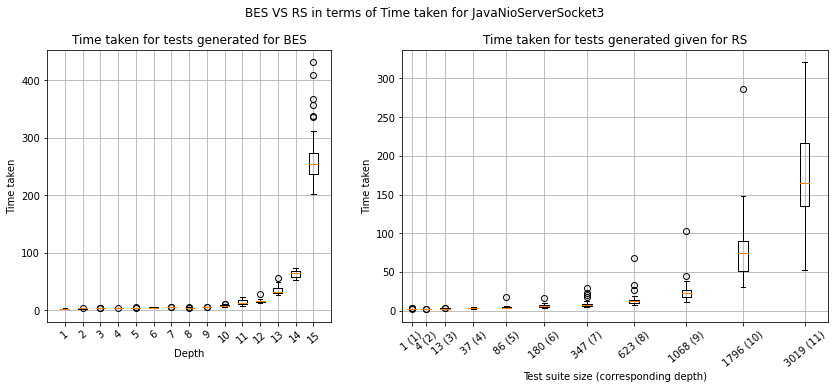

In [15]:
# time_taken
creteria = 'time_taken'
data_map['bes_title'] = f'Time taken for tests generated for BES{bool_to_shortcut(loopOpt)}'
data_map['y_bes_label'] = 'Time taken'
data_map['distance_to_figures'] = 1

data_map['rand_title'] = f'Time taken for tests generated given for RS'
data_map['y_rand_label'] = 'Time taken'
data_map['width_rand_ratio']: 1

time_taken = extract_unique_as_map(bes_csv, u_bes, 'depth', creteria)
# print_map(time_taken, 'depth')

compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', creteria,
                         u_bes, u_random, data_map)



In [16]:
# trie total path 
# creteria = 'trie_total_path'


# trie_total_path = extract_unique_as_map(bes_csv, u_bes, 'depth', creteria)
# print_map(trie_total_path, 'depth')

# print("**********************")
# latex = to_latex('total trie path', trie_total_path)
# print(latex)
# print("**********************")

# # fig, ax = plt.subplots(figsize=(12, 6))

# data_map['bes_title'] = f'Total number of test generated by the \ntrie given the depth for BES'
# data_map['y_bes_label'] = 'Total test number in the trie'

# plot_one_box(bes_csv, 'depth', creteria, u_bes, data_map)


trie_total   : [1, 4, 13, 37, 94, 227, 534, 1236, 2829, 6421, 14477, 32462, 72455, 161082, 356896]
actual before: [1, 4, 13, 37, 86, 180, 347, 618, 1058, 1793, 2997, 5122, 8834, 15618, 28418]
actual after : [1, 4, 13, 37, 86, 180, 347, 623, 1068, 1796, 3019, 5122, 8834, 15618, 28418]
**********************
\begin{table}[trie vs actual]
\begin{tabular}{|c||c|c|}
\hline
& Depth & Total number of tests generated by the trie & Actual number of tests generated by Modbat \\ \hline \hline
1 & 1 & 1  \\ \hline
2 & 4 & 4  \\ \hline
3 & 13 & 13  \\ \hline
4 & 37 & 37  \\ \hline
5 & 94 & 86  \\ \hline
6 & 227 & 180  \\ \hline
7 & 534 & 347  \\ \hline
8 & 1236 & 623  \\ \hline
9 & 2829 & 1068  \\ \hline
10 & 6421 & 1796  \\ \hline
11 & 14477 & 3019  \\ \hline
12 & 32462 & 5122  \\ \hline
13 & 72455 & 8834  \\ \hline
14 & 161082 & 15618  \\ \hline
15 & 356896 & 28418  \\ \hline
\end{tabular}
\end{table}
**********************


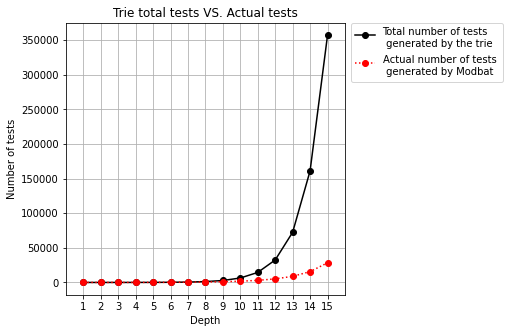

In [17]:
y1 = extract_unique_as_list(bes_csv, u_bes, 'depth', 'trie_total_path')
print(f'trie_total   : {y1}')
y2 = extract_unique_as_list(bes_csv, u_bes, 'depth', 'total_tests')
print(f'actual before: {y2}')
y2[7] = 623
y2[8] = 1068
y2[9] = 1796
y2[10] = 3019
print(f'actual after : {y2}')


print("**********************")
latex = to_latex_compare('trie vs actual', u_bes, y1, y2)
print(latex)
print("**********************")




data_map['bes_title'] = f'Trie total tests VS. Actual tests'
data_map['x_bes_label'] = 'Depth'
data_map['y_bes_label'] = 'Number of tests'

data_map['y1_label'] = 'Total number of tests \n generated by the trie'
data_map['y2_label'] = 'Actual number of tests \n generated by Modbat'


plot_one_linear(u_bes, y1, y2, data_map)


In [18]:
# have a list of uniques depthes
# then for each depth a box plot of coverage of it and the corresponding depth



#make sure that the random didn't get a timeout before a depth





